## **CHURN DATA MODELING**

L'objectif de cette modélisation est d'identifier les clients succeptible de ce désabonner une plateforme. Ces clients sont connues sous l'etiquette de "Churn"

***ABDOULAYE TANGARA***

***Student in Msc in Quantitative and Computable Economic***

LinkedIn : [LinkedIn](https://www.linkedin.com/in/abdoulaye-tangara-9219a2293/)

Github : [Mon GitHub](https://github.com/ABLO1234)

Site web : [Mon portfolio](https://portfolio-6uesly8j5ll7zljczjygm7.streamlit.app/)

Email : abdoulayetangara722@gmail.com

In [2]:
# Module necessaire
import pandas as pd #  Manipulation des données
from tabulate import tabulate
import numpy as np # Calcule mathématique
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import scipy.stats as stat # Test statistique

from skimpy import skim # Statistiques descriptives
import warnings
import random

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Modèle de prediction
from sklearn.model_selection import train_test_split, GridSearchCV   # Division le dataset en train et test 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer   # Transformation des colonnes par types
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Fonction de transformation
from sklearn.decomposition import PCA   # Pour redimensionnalité
from imblearn import pipeline
import joblib

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [3]:
# Importation du dataset
churn = pd.read_csv("data_churn.csv", delimiter = ",")
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Information basique sur le dataset
print("\n Description des variables : \n")
print(churn.describe().T)


 Description des variables : 

                 count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75  


## I.   **ANALYSE UNIVARIEE**

Il s'agit ici de se faire une idée du comportement de chaque variable prise individuelle.

1. ***Analyse de la dimension du dataset utilisé***

In [5]:
print("Le nombre de ligne du dataset est de : ", churn.shape[0])
print("Le nombre de colonne du dataset est de : ", churn.shape[1])

Le nombre de ligne du dataset est de :  7043
Le nombre de colonne du dataset est de :  21


2. ***Analyse du type des variables dans le dataset***

In [6]:
print(f"Les colonnes du dataset :\n {churn.columns}")
print(" \n Les types de variables utilisées : \n", churn.dtypes.T)

Les colonnes du dataset :
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
 
 Les types de variables utilisées : 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        

3. ***Traitement preliminaire du dataset***
    * Recherche des valeurs manquantes
    * Conversion des variables
    * Imputation des variables

In [7]:
# Analyse des missings values
convert_var = churn["TotalCharges"].replace(" ", np.nan)

# Conversion des variables
churn["TotalCharges"] = convert_var.astype(float)
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
    churn[col] = churn[col].astype("category")

# Suppression de la variables "customerID"
churn.drop(columns="customerID", inplace=True)

print(" \n Chercher de valeur manquantes : \n", churn.isnull().sum().T)
churn.dropna(inplace=True)

print(" \n Dataset après correction des valeurs manquantes : \n", churn.isnull().sum())

 
 Chercher de valeur manquantes : 
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
 
 Dataset après correction des valeurs manquantes : 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn            

4. ***Statistique descriptive des variables***

In [ ]:
# Les modilitées des chaque variables
for col in churn.select_dtypes(include=['category']).columns.tolist():
    print(f'\n Les modalites de {col}', churn[col].unique())

# Analyse descriptives des valeurs Quantitatives et Qualitatives
skim(churn)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 7032   │ │ category    │ 17    │ │ gender                │                                │
│ │ Number of columns │ 20     │ │ float64     │ 2     │ │ SeniorCitizen         │                                │
│ └───────────────────┴────────┘ │ int32       │ 1     │ │ Partner               │                                │
│                                └─────────────┴───────┘ │ Dependents            │                                │
│                                                        │ PhoneService          │                                │
│                                                        │ MultipleLines         │                                │
│                                                        │ InternetService       │                                │
│                                                        │ OnlineSecurity        │                                │
│                                                        │ OnlineBackup          │                                │
│                                                        │ DeviceProtection      │                                │
│                                                        │ TechSupport           │                                │
│                                                        │ StreamingTV           │                                │
│                                                        │ StreamingMovies       │                                │
│                                                        │ Contract              │                                │
│                                                        │ PaperlessBilling      │                                │
│                                                        │ PaymentMethod         │                                │
│                                                        │ Churn                 │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ tenure            │   0 │      0 │   32.42 │  24.55 │      1 │      9 │     29 │     55 │     72 │ ▇▃▃▃▃▅  │  │
│ │ MonthlyCharges    │   0 │      0 │    64.8 │  30.09 │  18.25 │  35.59 │  70.35 │  89.86 │  118.8 │ ▇▃▃▇▇▃  │  │
│ │ TotalCharges      │   0 │      0 │    2283 │   2267 │   18.8 │  401.4 │   1397 │   3795 │   8685 │ ▇▃▂▂▁▁  │  │
│ └───────────────────┴─────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                              ┃ NA       ┃ NA %         ┃ ordered             ┃ unique          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━

5. ***Analyse graphique des variables catégorielles à deux modalités***

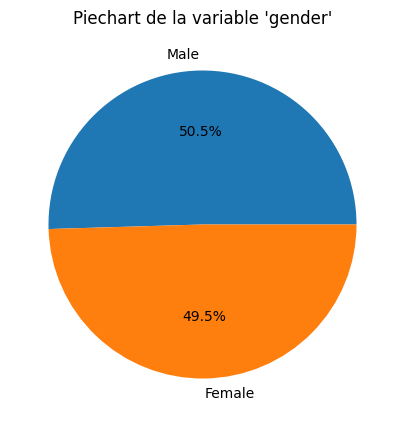

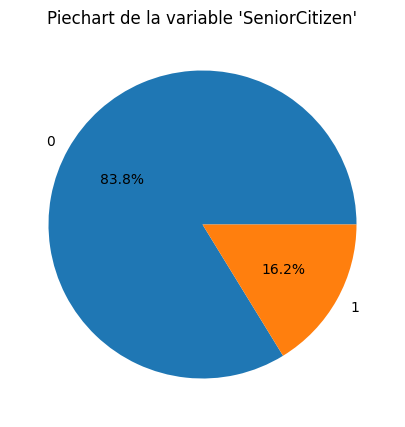

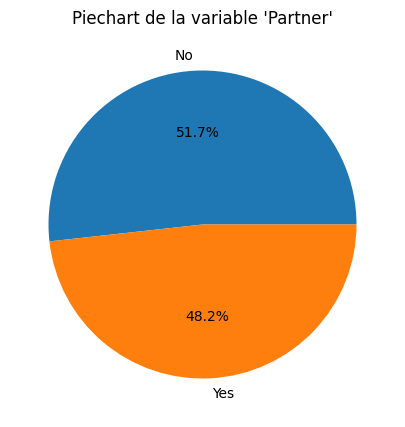

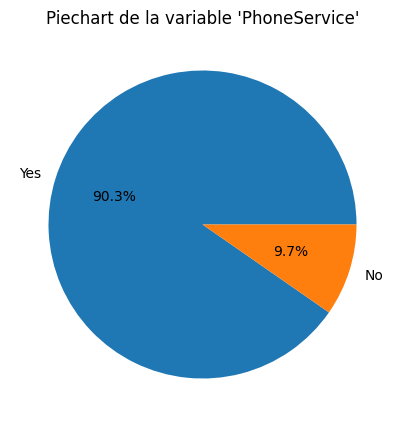

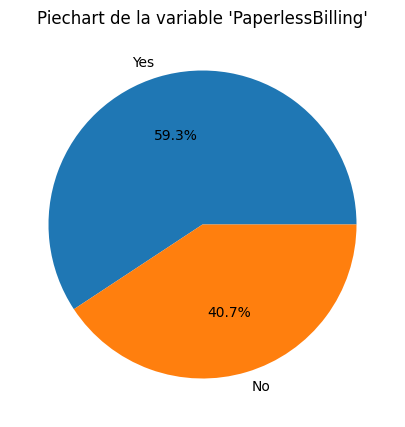

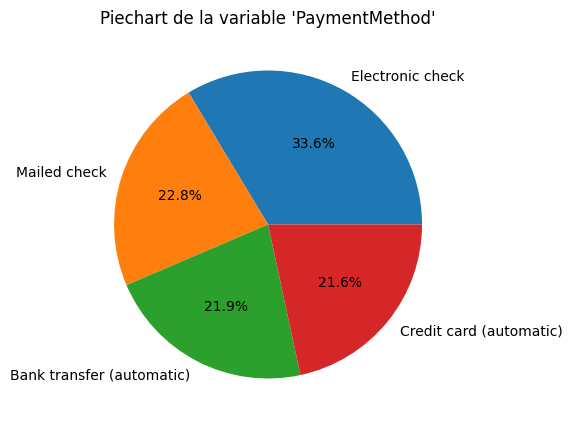

In [9]:
var_quali_1 = ['gender', 'SeniorCitizen', 'Partner',
       'PhoneService', 'PaperlessBilling', 'PaymentMethod']
for i in var_quali_1:
    plt.figure(figsize=(10,5))
    count = np.round(churn[i].value_counts()/churn.shape[0]*100, 2)
    
    plt.pie(count, labels=count.index, autopct="%1.1f%%")
    plt.title(f"Piechart de la variable '{i}'")
    plt.show()

6. ***Analyse visualisation des variables catégorielles à plus deux modalites***

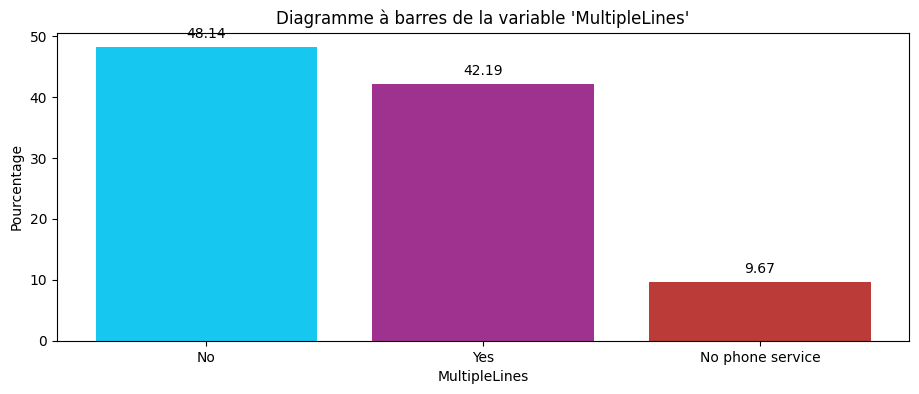

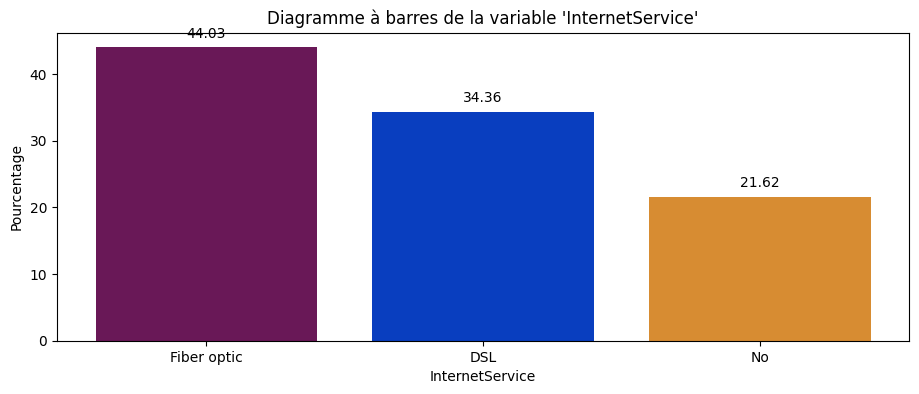

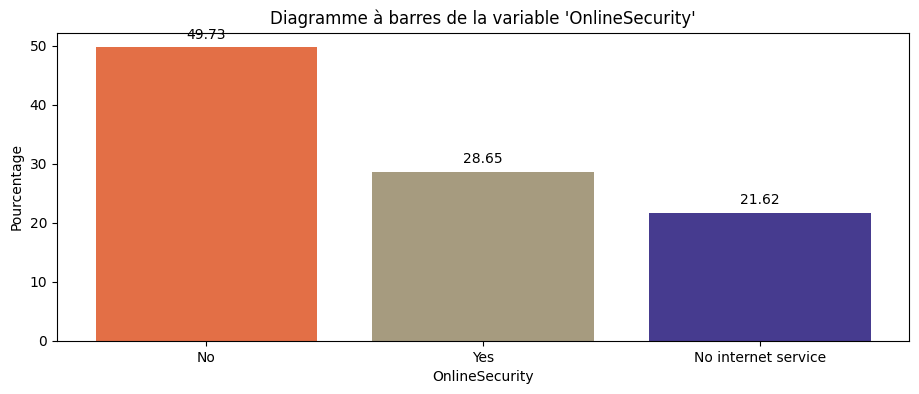

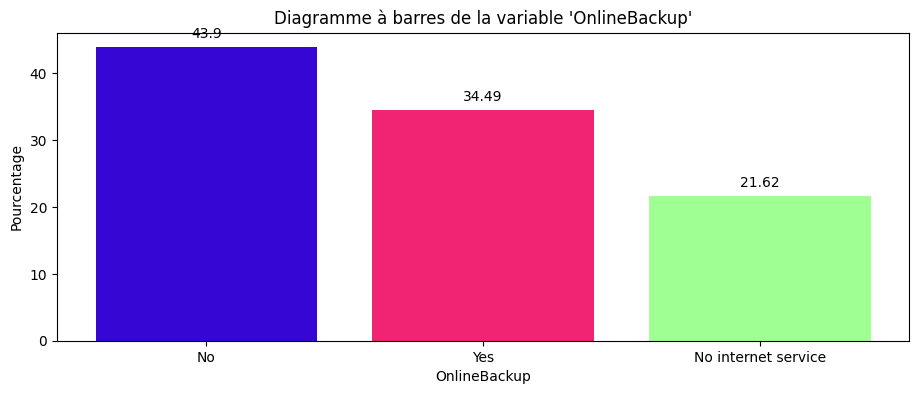

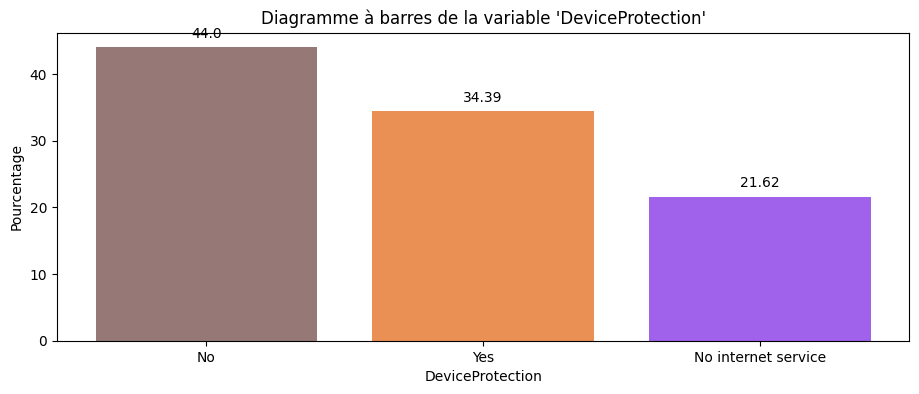

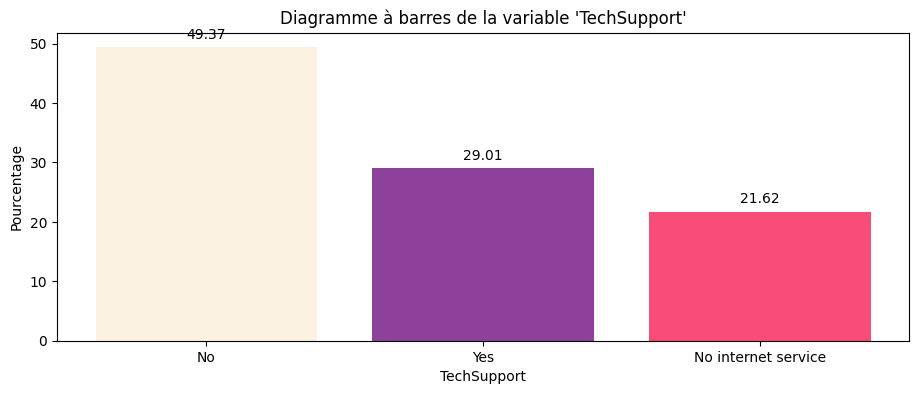

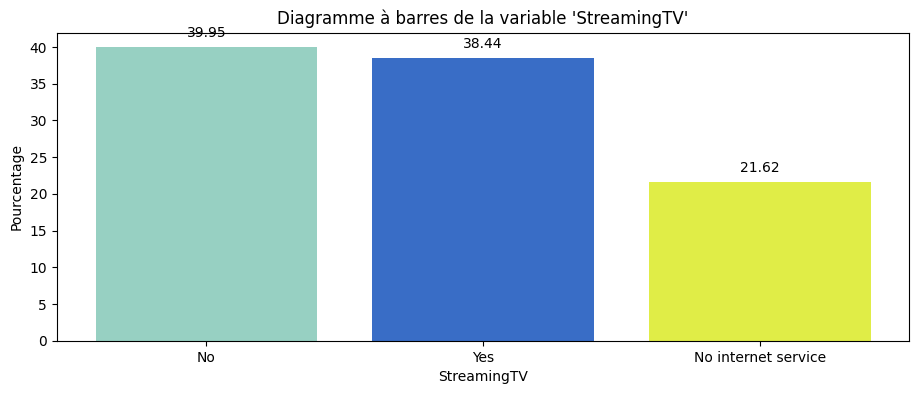

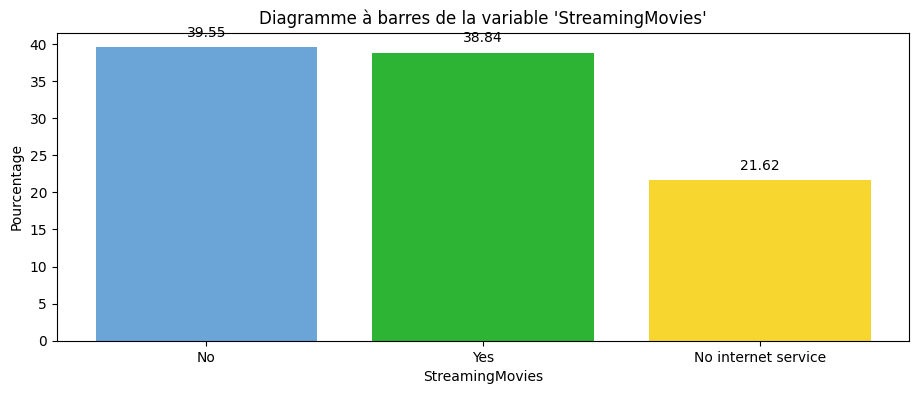

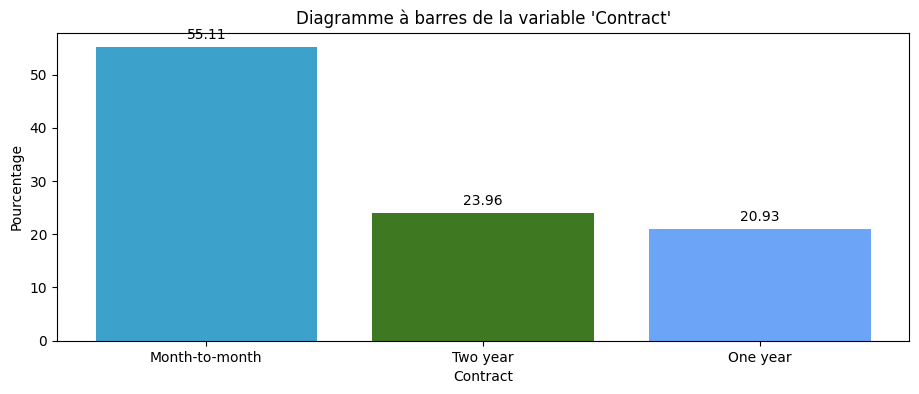

In [10]:
var_quali_2 = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract']
for i in var_quali_2:
    count = np.round((churn[i].value_counts() / churn.shape[0]) * 100, 2)
    plt.figure(figsize=(11, 4))
    
    # Génération de couleurs aléatoires pour chaque barre
    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(count))]
    
    bars = plt.bar(count.index, count.values, color=colors)
    plt.title(f"Diagramme à barres de la variable '{i}'")
    
    # Ajout des valeurs au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')
    
    plt.xlabel(i)
    plt.ylabel('Pourcentage')
    plt.show()

7. ***Analyse de la dispersion des variables quantitatives***

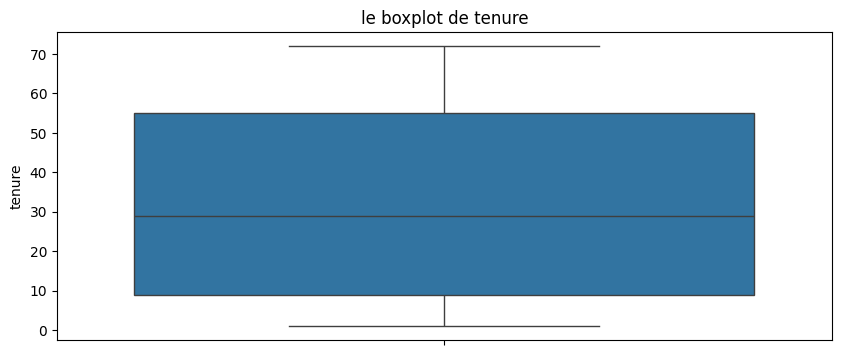

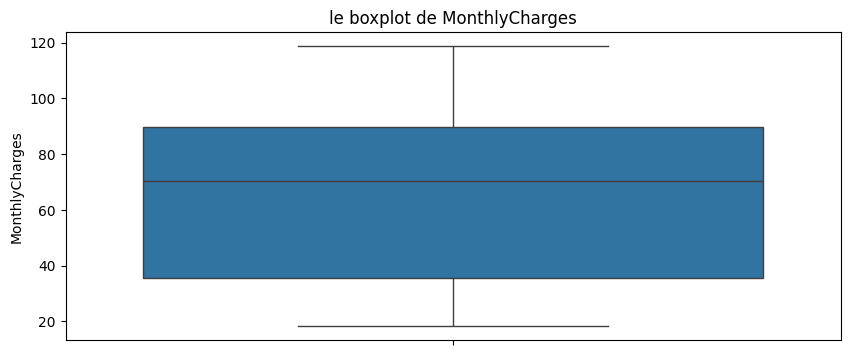

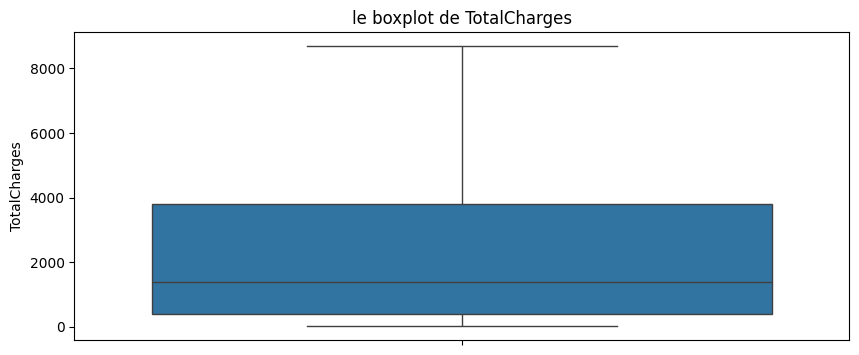

In [11]:

var_quanti_1 = churn.select_dtypes(include=[float, int]).columns.to_list()

for i in var_quanti_1:
    plt.figure(figsize=(10,4))
    sns.boxplot(churn[i])
    plt.title(f"le boxplot de {i}")
    plt.show()

8. ***Test de normalité des variables quantitatives***

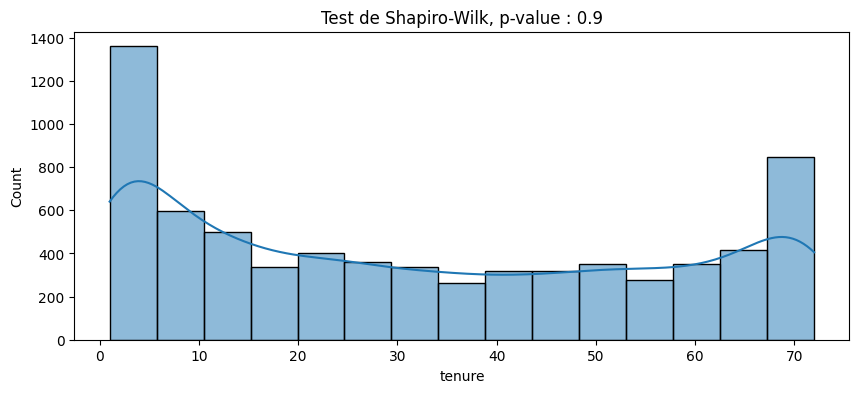

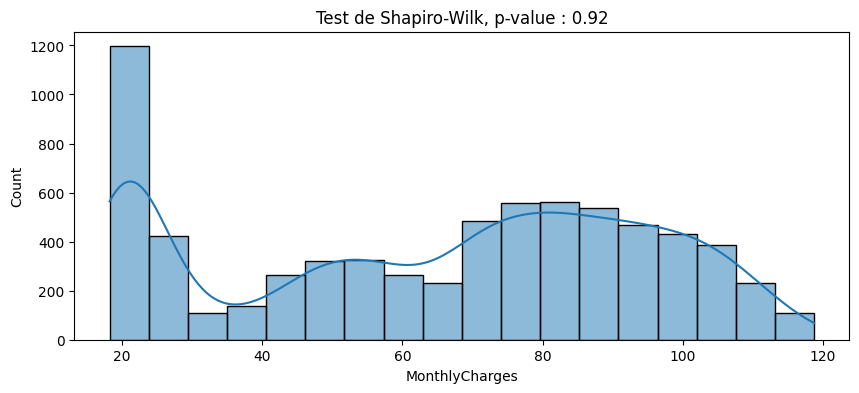

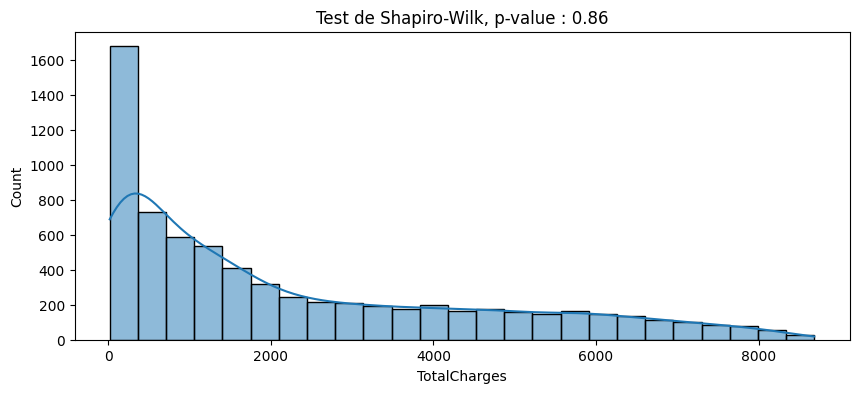

In [12]:
# Analyse de normalité des variables quantitatives
for i in var_quanti_1:
    pvalue , _ = stat.shapiro(churn[i])
    plt.figure(figsize=(10,4))
    sns.histplot(churn[i],kde=True)
    plt.title(f"Test de Shapiro-Wilk, p-value : {np.round(pvalue, 2)}")
    plt.show()

## II. **ANALYSE BIVARIEE**

Il s'agit d'étudier la relation qui existe entre les variables deux à deux avec les tests correspondants à chaque liaison ou association. 

Dans un premier temps, analyser les variables quantitatives et qualitatives entre elles. Dans un second temps, analyser la relation variable qualitative et quantitative.

***1. Relation des variables quantitative - quantitative***

les variables tenure et MonthlyCharges sont corrélées avec pvalue = 0.0
les variables tenure et TotalCharges sont corrélées avec pvalue = 0.0
les variables MonthlyCharges et tenure sont corrélées avec pvalue = 0.0
les variables MonthlyCharges et TotalCharges sont corrélées avec pvalue = 0.0
les variables TotalCharges et tenure sont corrélées avec pvalue = 0.0
les variables TotalCharges et MonthlyCharges sont corrélées avec pvalue = 0.0


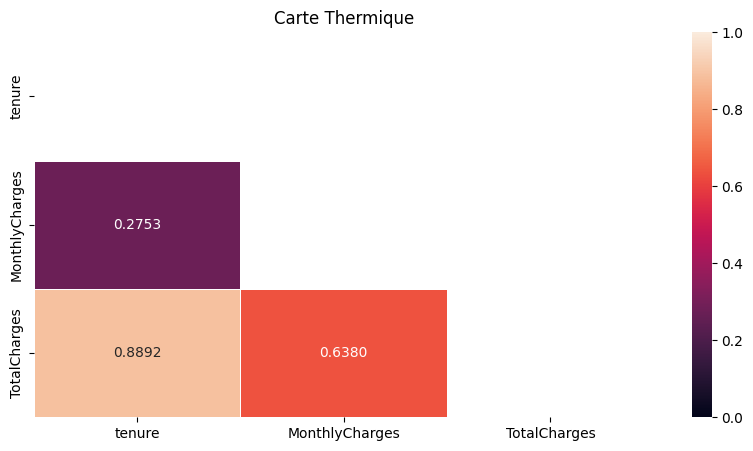

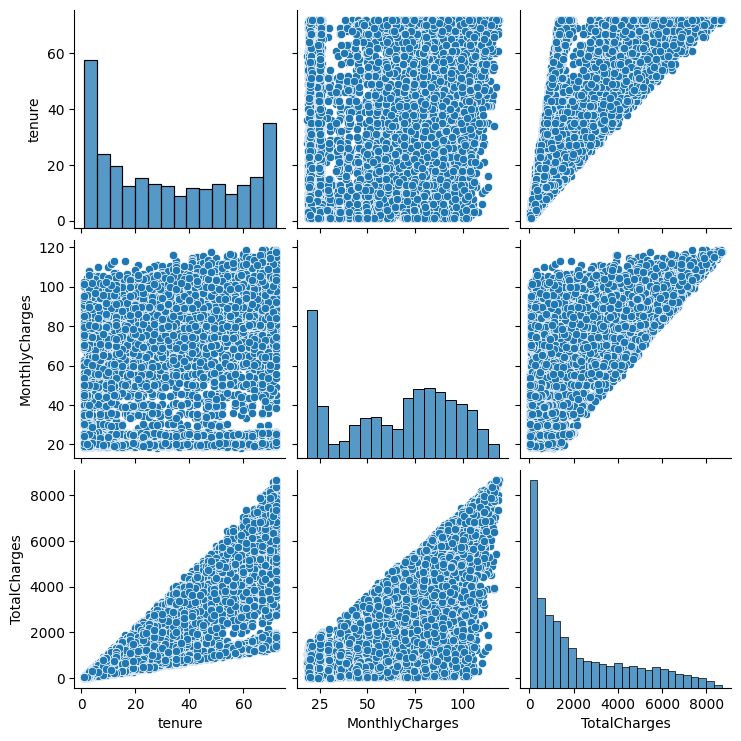

In [13]:
# Analyse quanti-quanti
r = churn[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(method="spearman") 
for i in churn[['tenure', 'MonthlyCharges', 'TotalCharges']].columns.to_list():
    for j in churn[['tenure', 'MonthlyCharges', 'TotalCharges']].columns.to_list():
        if i != j:

            # Test de spearman car les variables ne sont pas normalement distribuées
            spearman_corr, pvalue = stat.spearmanr(churn[i], churn[i])
            if pvalue<0.05 and spearman_corr > 0.5:
                text1 = f"les variables {i} et {j} sont corrélées avec pvalue = {np.round(pvalue,2)}"
                print(text1)
            elif pvalue<0.05 and spearman_corr < 0.5:
                text2 = f"les variables {i} et {j} ne sont pas corrélées avec pvalue = {np.round(pvalue,2)}"
                print(text2)
            else:
                print("la valeurs des statistiques calculées ne sont pas significatives pour conclure")
mask = np.triu(np.ones(r.shape, dtype=int))
plt.figure(figsize=(10,5))
sns.heatmap(r, vmax = 1, vmin=0, fmt=".4f", annot=True, linewidths=0.5, mask=mask)
plt.title("Carte Thermique")
plt.show()


# Pair plot
sns.pairplot(churn[['tenure', 'MonthlyCharges', 'TotalCharges']])

***2. Relation des variables quantitative - qualitative***

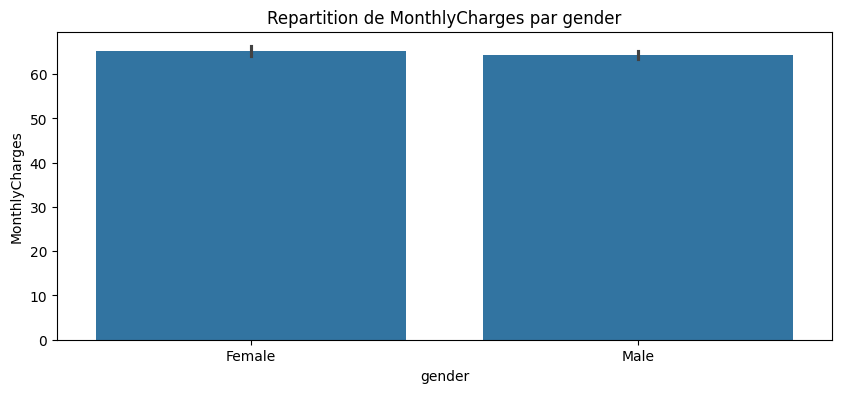

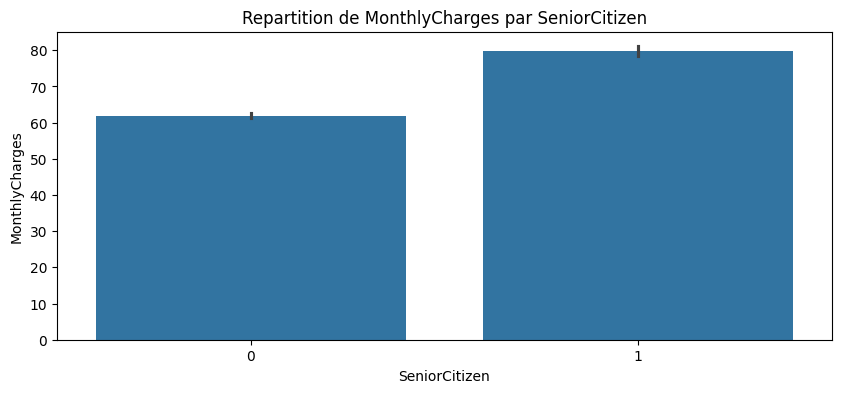

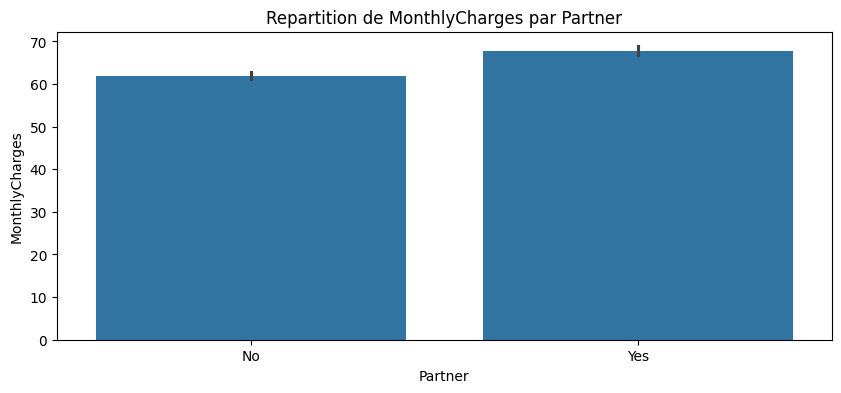

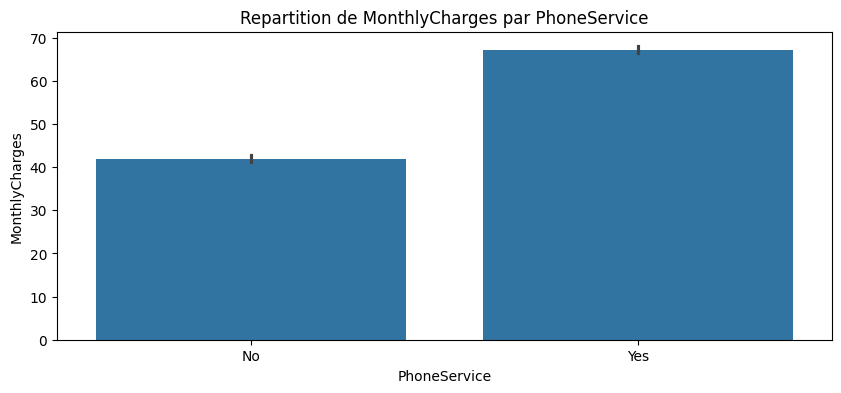

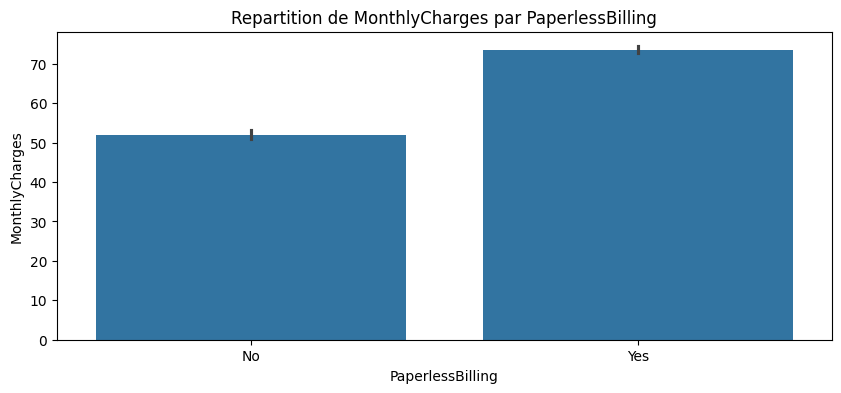

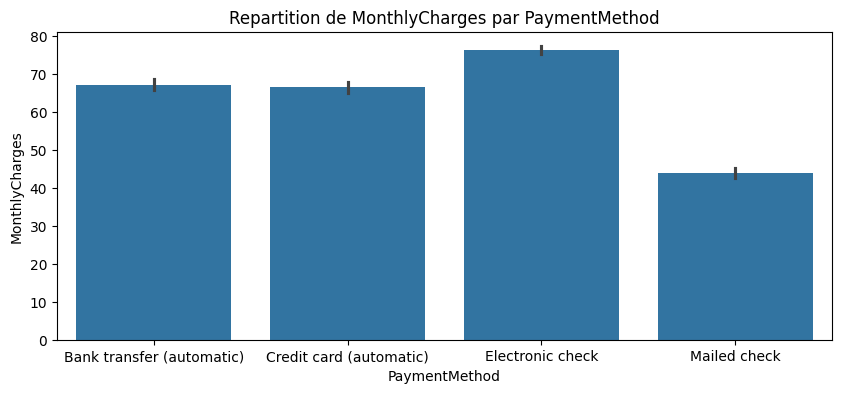

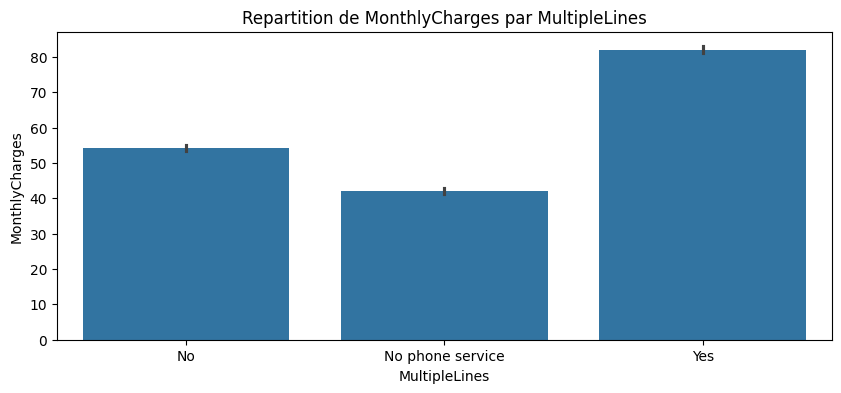

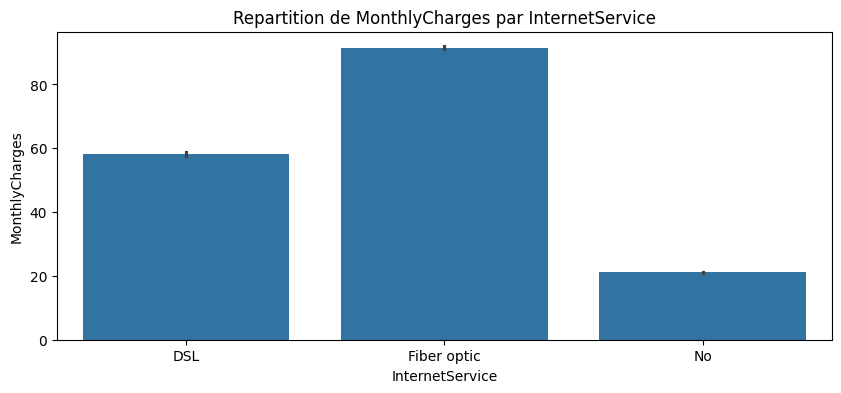

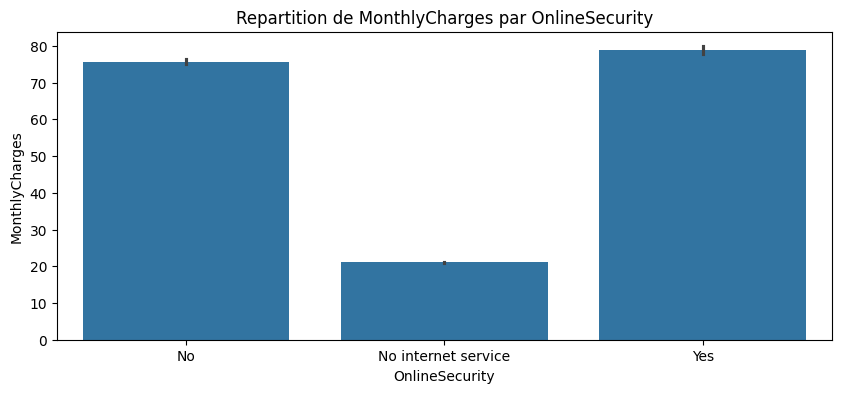

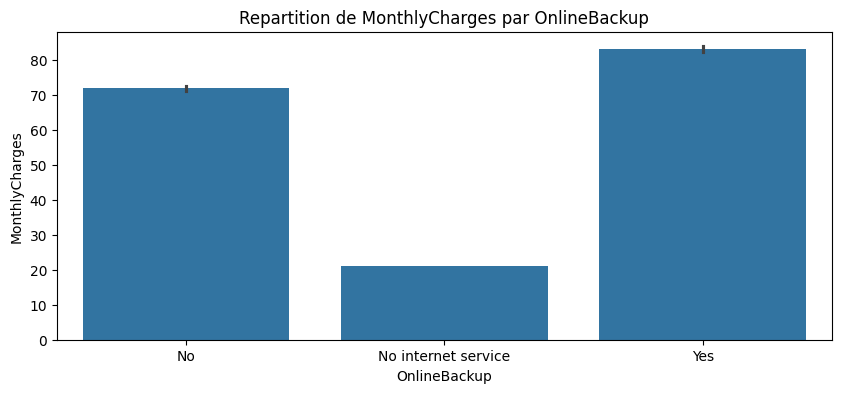

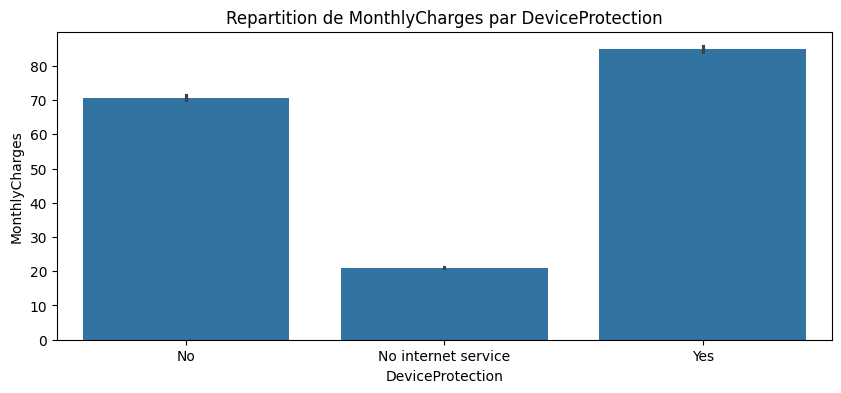

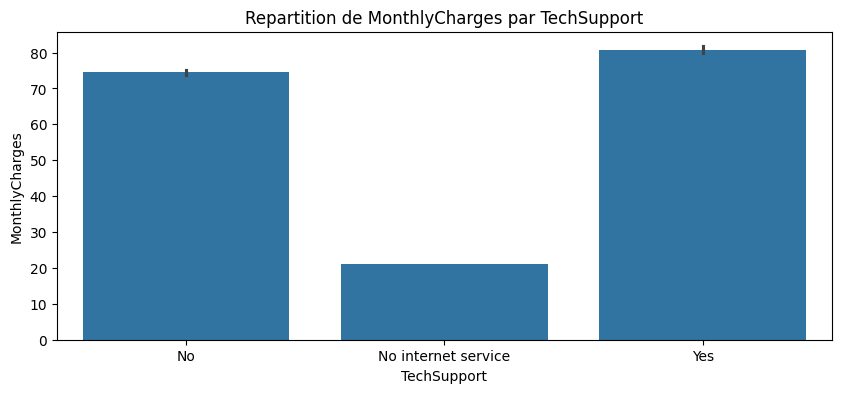

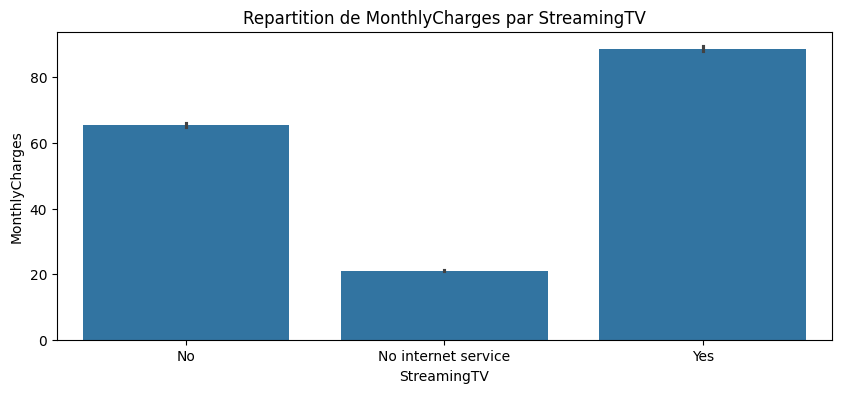

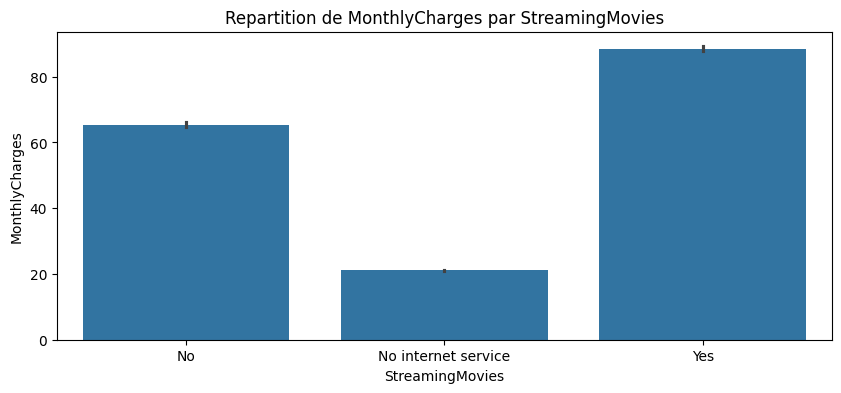

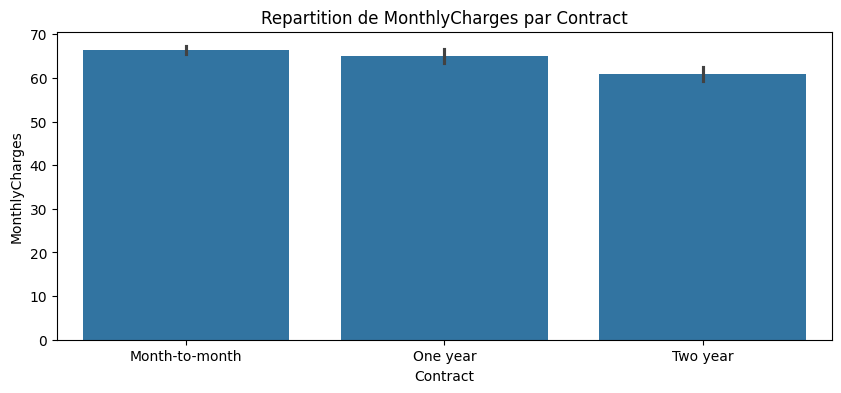

In [14]:
# analyse quanti-quali
var_quanti_1
for val in var_quali_1 :
    plt.figure(figsize=(10,4))
    sns.barplot(x=churn[val], y = churn[var_quanti_1[1]], estimator="mean")
    plt.title(f"Repartition de {var_quanti_1[1]} par {val}")
    plt.show()

var_quali_g = var_quali_1 + var_quali_2 # Total des variables catégorielles

for val in var_quali_2 :
    plt.figure(figsize=(10,4))
    sns.barplot(x=churn[val], y = churn[var_quanti_1[1]], estimator="mean")
    plt.title(f"Repartition de {var_quanti_1[1]} par {val}")
    plt.show()

In [ ]:
# Tableaux croisés
for i in var_quali_g:
    for j in var_quali_g:
        if i != j:
            tab = pd.crosstab(churn[i], churn[j])
            chi2_stat, p_value, dof, expected = stat.chi2_contingency((tab))
            print(f" Tableau croisé entre {i} et {j} : \n {tabulate(tab, headers='keys', tablefmt='pipe')}")
            print(f"\n Statistique de Khideux : {chi2_stat:.4f}")
            print(f"P-value : {p_value:.4f}, degré de liberté : {dof}")
            print(f"Tableau des valeurs attendues : {expected[0][0]:.4f} \n")
            print("-----------------------------------------------------------")

## **ANALYSE MULTIVARIEE**

Cherche à comprendre les relations multiples qui existe entre les différentes variables.

Identifier les variables utiles et inutiles

***1. Encodage et normalisation*** 

***a. Encodage des variables catégorielles***

In [16]:
binaire_list = ['Partner', 'Dependents',
       'PhoneService', 'PaperlessBilling', 'Churn']
for i in binaire_list:
    churn[i] = churn[i].replace(
        {
            'No' : 0, 'Yes' : 1
        }
    )

churn["gender"] = churn["gender"].replace(
    {
       'Female' : 0 , 'Male': 1
    }
)

# Get dummieser les variables categorielles
col_demmies = pd.get_dummies(churn[[ 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod'
  ]], prefix=['Mul', 'IntS', 'OnlS', 'OnlB', 'DevP', 'TechS', 'StrTV', 'StrM', 'Con', 'PayM'], prefix_sep='_', dtype=int)
churn_encoded = pd.concat([churn, col_demmies], axis = 1)

# Suppression des variables initiales
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod']:
      churn_encoded.drop(columns=col, axis=1, inplace=True)

***b. Normalisation des variables numériques***

In [17]:
churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = (churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] - churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']].mean())/churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']].std()


##    Selection du set des features et du target pour l'ACP et la modélisation
features = churn_encoded.drop(columns=["Churn"], axis = 1)
target = churn_encoded["Churn"]

churn_encoded.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StrM_No,StrM_No internet service,StrM_Yes,Con_Month-to-month,Con_One year,Con_Two year,PayM_Bank transfer (automatic),PayM_Credit card (automatic),PayM_Electronic check,PayM_Mailed check
0,0,0,1,0,-1.280157,0,1,-1.161611,-0.994123,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064298,1,0,-0.260859,-0.173727,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239416,1,1,-0.363897,-0.959581,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512450,0,0,-0.747797,-0.195234,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239416,1,1,0.196164,-0.940391,1,...,1,0,0,1,0,0,0,0,1,0


***c. Mise en place de l'Analyse des composantes principales***

*   Valeur propre
*   Coeficient des vecteurs propres
*   Variance expliquée (et cumulée)

In [18]:
# Instancier l'ACP
pca = PCA()

# Redimmensionnalisation
features_pca = pca.fit_transform(features)

composants = pd.DataFrame(
    {
        "Dimension" : ["PCA" + str(x+1) for x in range(features.shape[1])],
        "Valeur Propre" : np.round(pca.explained_variance_, 2),
        "Taux de variance_expliquee" : np.round(pca.explained_variance_ratio_*100, 3),
        "Taux de variance_expliquee_cum": np.round(np.cumsum(pca.explained_variance_ratio_)*100)
    }
)

print(np.sum(composants["Valeur Propre"]))
composants.head(5)

10.55


,Dimension,Valeur Propre,Taux de variance_expliquee,Taux de variance_expliquee_cum
0,PCA1,3.30,31.285,31.0
1,PCA2,2.15,20.323,52.0
2,PCA3,0.79,7.469,59.0
3,PCA4,0.45,4.255,63.0
4,PCA5,0.37,3.473,67.0


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40
gender,-0.002201,0.001311,0.007349,0.011904,-0.030505,0.047795,-0.075246,-0.070240,0.039182,0.167645,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,5.010264e-16,-0.000000e+00,0.000000e+00,0.000000e+00
PaperlessBilling,0.085362,-0.087014,-0.093774,0.044316,-0.082861,-0.072235,-0.099479,-0.004853,-0.107165,0.027239,...,-6.729021e-17,1.516419e-17,5.425967e-17,3.048164e-17,-4.603101e-16,1.331327e-16,-5.438219e-16,-1.865972e-16,5.915279e-17,1.195458e-16
PayM_Mailed check,-0.097597,0.023169,0.037847,-0.106937,0.114336,-0.040110,0.124201,0.039667,0.055057,0.036159,...,-8.031081e-02,-1.601888e-01,-6.446354e-02,-1.610111e-01,-2.933567e-01,1.114551e-01,4.883400e-02,1.643730e-02,-1.171908e-01,2.812664e-02
TotalCharges,0.478086,0.293637,-0.014822,0.097496,0.096553,0.021652,-0.044260,-0.107939,-0.074205,-0.021081,...,1.526314e-15,1.133208e-15,1.016395e-18,7.927889e-16,-2.961900e-16,8.127488e-16,1.377681e-15,-2.075235e-16,-8.971792e-16,-9.807872e-16
Con_One year,0.020571,0.065260,0.043232,-0.064796,0.043498,0.028824,-0.116846,-0.069906,-0.002615,-0.101311,...,-7.964832e-02,-2.322479e-01,2.182405e-01,4.158779e-02,-6.083954e-02,6.595136e-02,1.909235e-01,6.716904e-02,7.015759e-02,-6.720833e-02


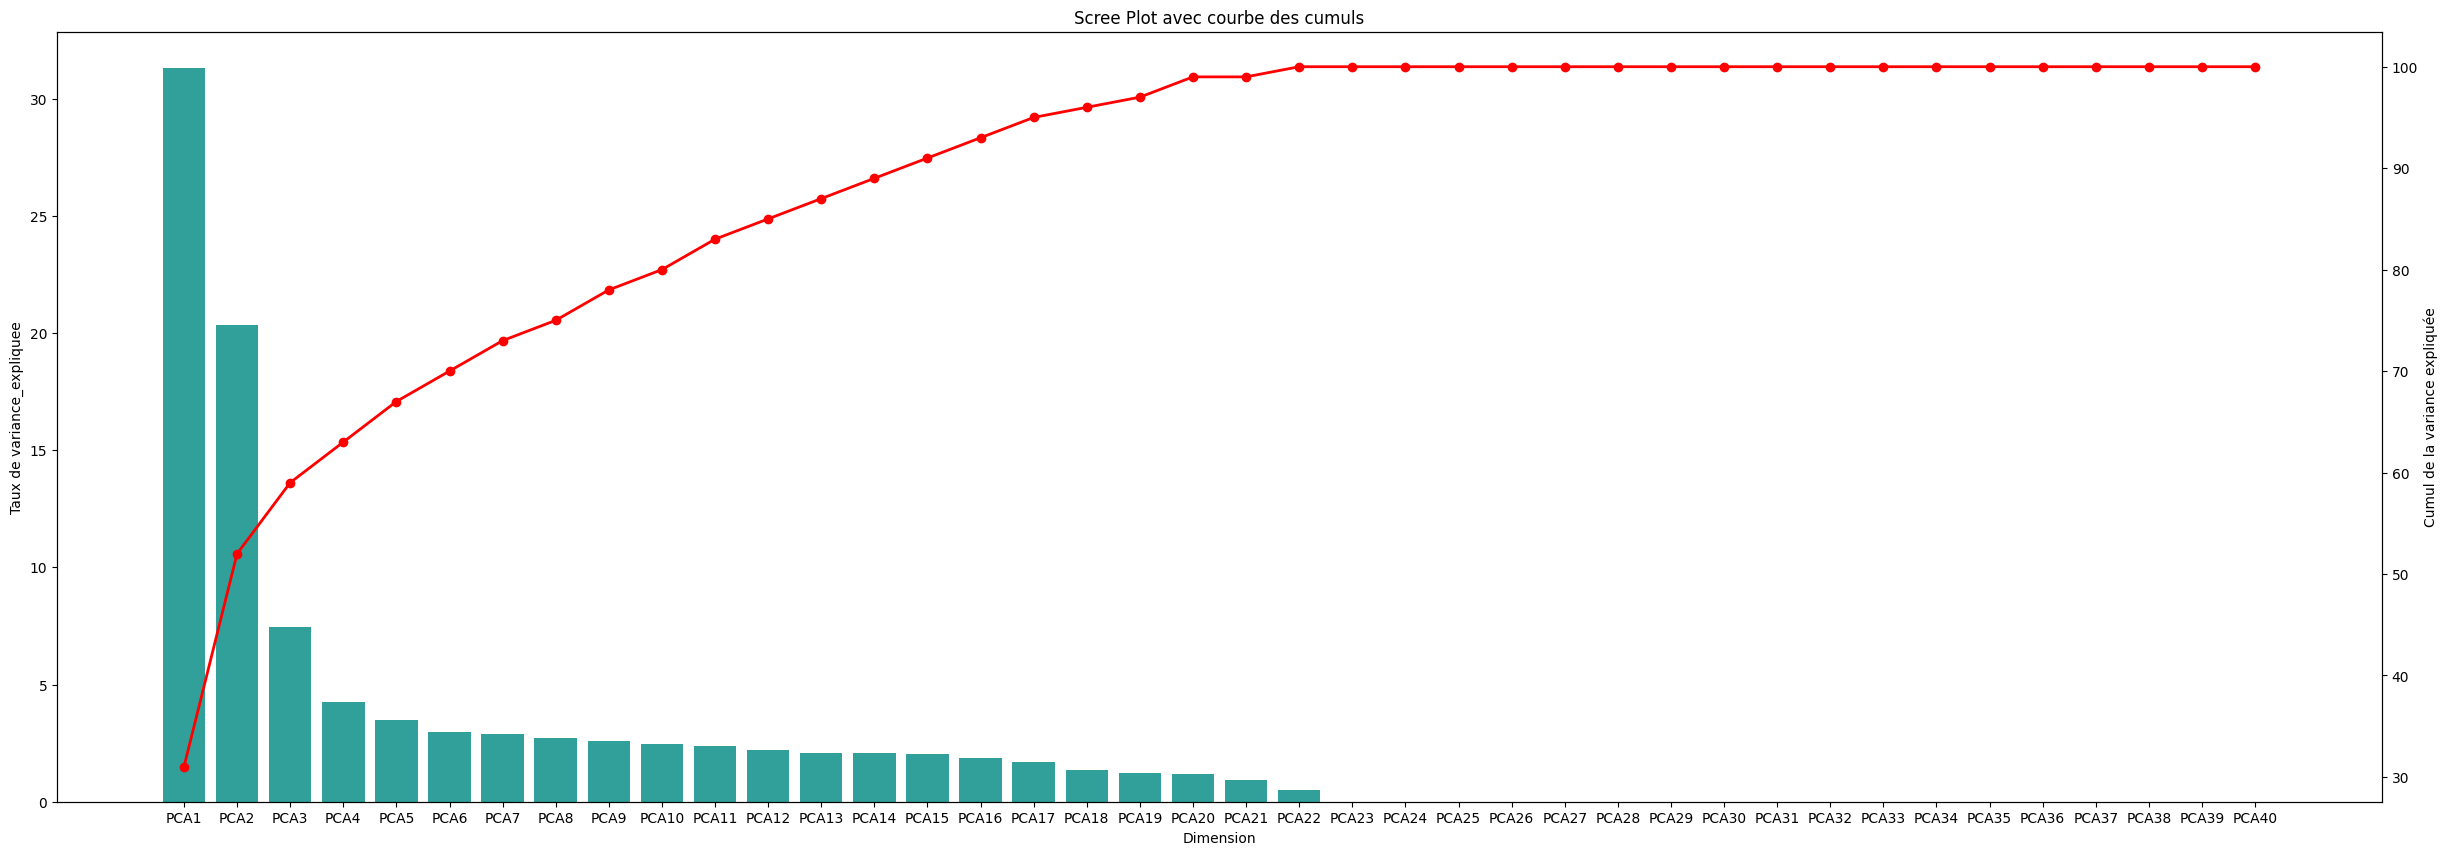

In [19]:
# Calcul des indicateurs utiles pour l'analyse
dim = composants.loc[:, "Dimension"]
variance_rate = composants.loc[:,"Taux de variance_expliquee"]
variance_rate_cum = composants.loc[:, "Taux de variance_expliquee_cum"]

# Representation graphique
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = dim, y = variance_rate, palette = ["lightseagreen"])
ax.set_title('Scree Plot avec courbe des cumuls')
ax2 = ax.twinx() 
ax2.plot(dim, variance_rate_cum, color='red', marker='o', linestyle='-', linewidth=2) 
ax2.set_ylabel('Cumul de la variance expliquée')


# Impact de variables initiales sur les composantes
vecteur_propre = pd.DataFrame(
    pca.components_.T, 
    columns=["PCA" + str(x+1) for x in range(features.shape[1])], 
    index = features.columns.to_list())

# Tri des variables par leur contribution absolue maximale à une composante principale
vecteur_propre_sorted = vecteur_propre.abs().max(axis=1).sort_values(ascending=False).index
vecteur_propre = vecteur_propre.loc[vecteur_propre_sorted]

# Affichage du tableau croisé des 5 premières variables les plus contributives
vecteur_propre.head(5)

In [20]:
# Contribution de chaque variable
vecteur = pca.components_.T

valeur = pca.explained_variance_
contribution = (vecteur**2)*valeur
contrib_percent = contribution / valeur * 100

column_names = [f'PC{i+1}_contrib' for i in range(features.shape[1])]
variable_contrib_df = pd.DataFrame(contrib_percent, columns=column_names, index=features.columns.to_list())
variable_contrib_df


,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib,PC5_contrib,PC6_contrib,PC7_contrib,PC8_contrib,PC9_contrib,PC10_contrib,...,PC31_contrib,PC32_contrib,PC33_contrib,PC34_contrib,PC35_contrib,PC36_contrib,PC37_contrib,PC38_contrib,PC39_contrib,PC40_contrib
gender,0.000484,0.000172,0.005401,0.014169,0.093054,0.228434,0.566191,0.493370,0.153525,2.810498,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,0.153520,0.174191,0.454570,0.723362,0.374846,0.188119,0.098498,0.739045,0.029636,0.295065,...,2.564657e-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,0.431457,1.351254,0.191480,0.811096,0.178620,6.250789,4.821240,28.218155,9.411988,0.721640,...,2.602885e-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,0.005451,0.795321,0.529569,0.001789,0.048860,4.628688,2.202482,28.387801,7.960987,1.266486,...,4.066236e-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,10.335350,24.363572,2.832915,10.674976,1.380016,1.514017,4.290224,3.158450,3.099347,0.035982,...,8.645880e-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,0.007165,0.026688,3.020857,0.325270,6.295524,1.170564,0.310034,0.000105,0.008769,0.350532,...,1.115430e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,0.728661,0.757137,0.879359,0.196391,0.686595,0.521795,0.989602,0.002355,1.148424,0.074198,...,4.527972e-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,24.595664,3.684099,8.638960,1.596343,5.783736,0.205995,1.312752,0.455312,0.217671,0.083813,...,1.322515e-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalCharges,22.856642,8.622259,0.021969,0.950556,0.932242,0.046879,0.195895,1.165081,0.550642,0.044440,...,2.329636e-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mul_No,1.765854,0.023900,0.025864,5.060840,22.374222,4.947464,17.611058,1.904024,1.135682,0.016493,...,9.951982e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


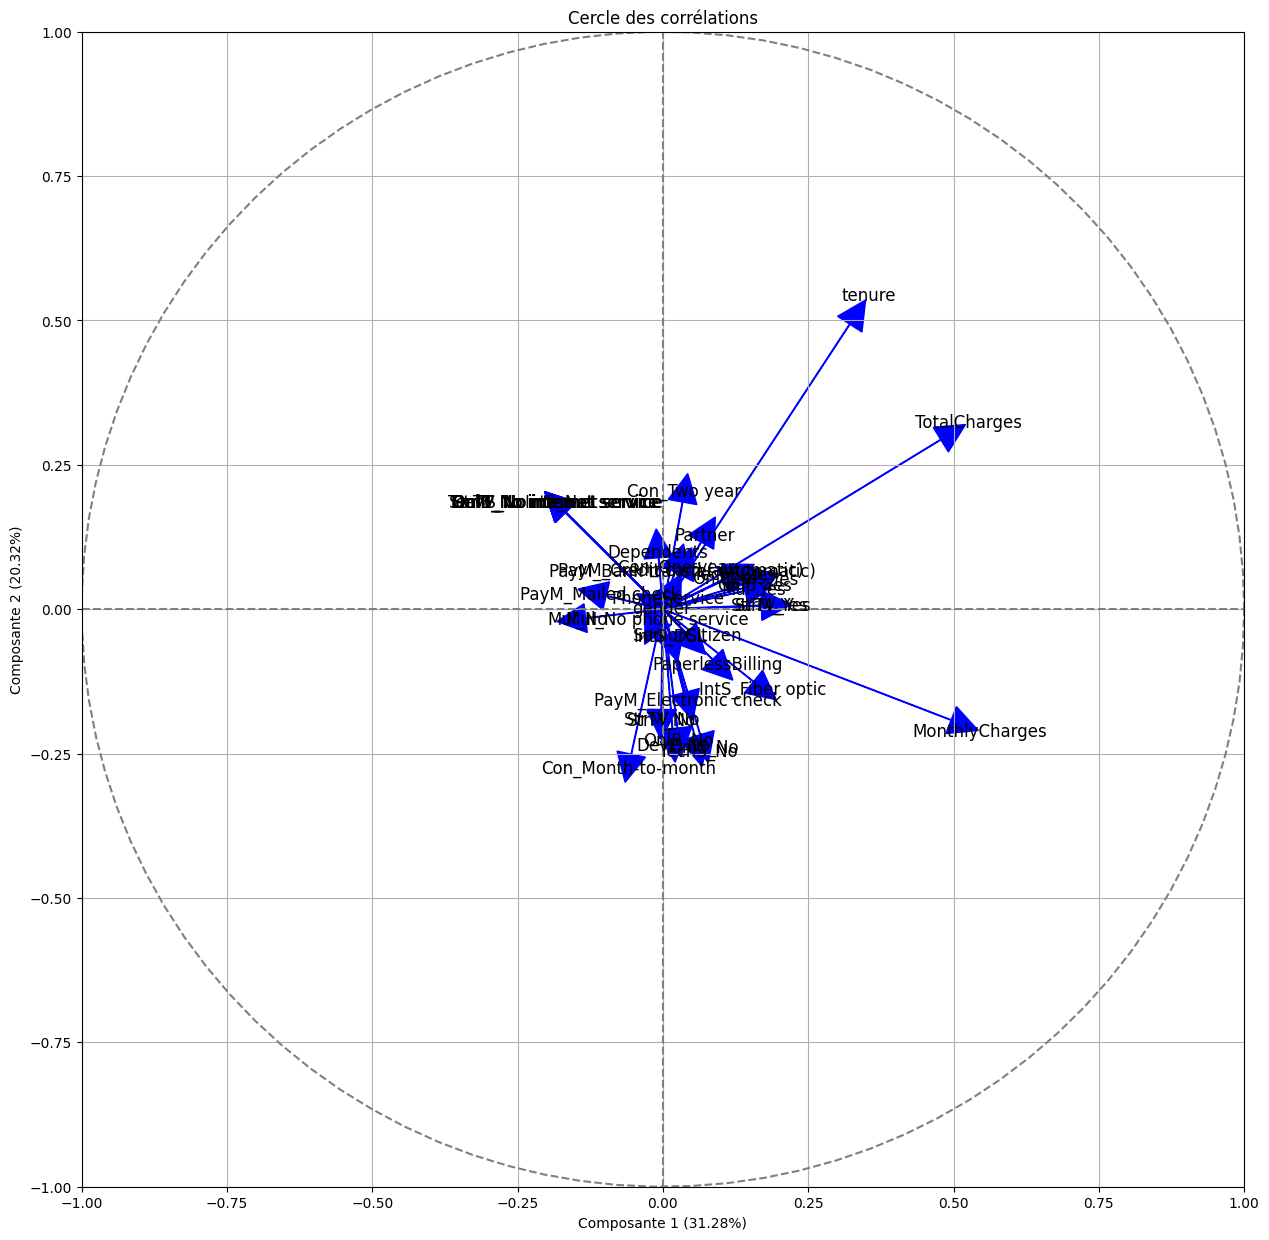

In [21]:
# Labels des variables
variables = features.columns.to_list()

vecteur = pca.components_.T
# Cercle unité
theta = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(15,15))
plt.plot(np.cos(theta), np.sin(theta), color='gray', linestyle="--")  # Cercle

# Ajout des vecteurs
for i, var in enumerate(variables):
    plt.arrow(0, 0, vecteur[i, 0], vecteur[i, 1], 
              head_width=0.05, head_length=0.05, color='b')
     # Positionnement du texte (ajusté dynamiquement)
    text_x = vecteur[i, 0] * 1.1
    text_y = vecteur[i, 1] * 1.1
    plt.text(text_x, text_y, var, color='black', fontsize=12, ha='center', va='center')

# Axes
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Configuration du graphique
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel(f"Composante 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)")
plt.ylabel(f"Composante 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)")
plt.title("Cercle des corrélations")
plt.grid()
plt.show()

## **CONTRUCTION DU MODELE DE ML**

***1. Elaboration du modèle avec les nouvelles variables***

In [22]:
feat = churn.drop(columns="Churn")
targ = churn["Churn"]
# Selection des variables par types
num_feature = feat.select_dtypes(include = float).columns
cat_feature = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod']

# Preprocessing
prepros = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_feature),
        ("normalizer", StandardScaler(), num_feature)     
])

# Pipeline

pipe = Pipeline([
    ("preprocessing", prepros),
    ("pca", PCA(n_components=5)),
    ("model_log", LogisticRegression(solver='liblinear', random_state=1))
])

# Train test split

X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=0.2, random_state=1 )

print(f"la taille du feature d'entrainement :\n {X_train.shape} \n")
print(f"la taille du target d'entrainement :\n {y_train.shape} \n")
print(f"la taille du feature de test :\n {X_test.shape} \n")
print(f"la taille du target de test :\n {y_test.shape} \n")

la taille du feature d'entrainement :
 (5625, 19) 

la taille du target d'entrainement :
 (5625,) 

la taille du feature de test :
 (1407, 19) 

la taille du target de test :
 (1407,) 



***2. Entrainement du modèle***

In [23]:
# Entrainement
pipe.fit(X = X_train, y = y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('normalizer',
                                                  StandardScaler(),
                                                  Index(['MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('pca', PCA(n_components=5)),
                ('model_log',
                 LogisticRegression(random_state=1, solver='liblinear'))])

***3. Prédiction***

In [24]:
y_pred = pipe.predict(X_test)

***4. Evaluation du modèle***

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.64      0.53      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



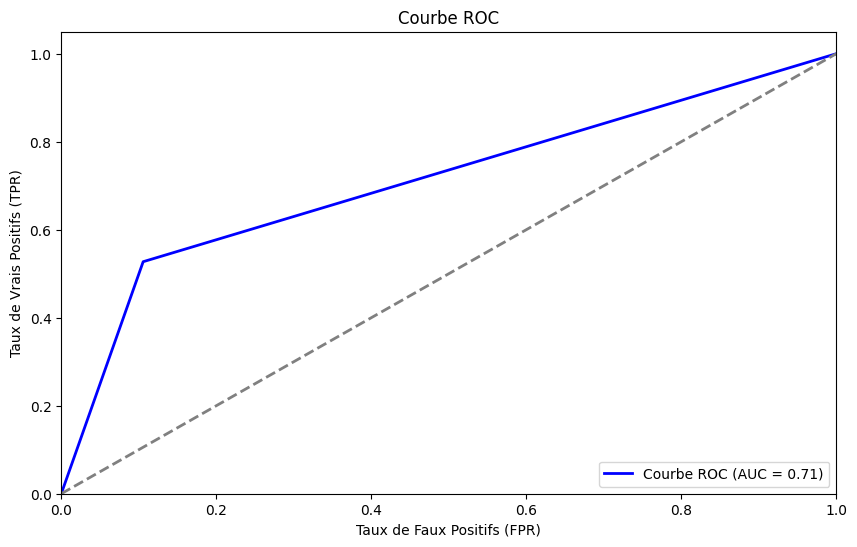

In [26]:
# Courbe ROC
# Calculer les métriques ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, y_pred) 
# Tracer la courbe ROC 
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('Taux de Faux Positifs (FPR)') 
plt.ylabel('Taux de Vrais Positifs (TPR)') 
plt.title('Courbe ROC') 
plt.legend(loc="lower right") 
plt.show()

***5. Optimisation des hyperparamètre avec le GridSearch***

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(churn_encoded.drop(columns="Churn"), churn_encoded["Churn"], test_size=0.2, random_state=1 )

# Définition des hyperparamètres à tester
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'solver': ['liblinear', 'saga']  # Solveurs compatibles
}

# Pipeline

model = LogisticRegression(max_iter=500)

# GridSearchCV avec validation croisée 5-fold
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement
grid_search.fit(X_train1, y_train1)

# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure performance :", grid_search.best_score_)

Meilleurs paramètres : {'penalty': 'l1', 'solver': 'saga'}
Meilleure performance : 0.8053333333333332


***ABDOULAYE TANGARA***

***Student in Msc in Quantitative and Computable Economic***

LinkedIn : [LinkedIn](https://www.linkedin.com/in/abdoulaye-tangara-9219a2293/)

Github : [Mon GitHub](https://github.com/ABLO1234)

Site web : [Mon portfolio](https://portfolio-6uesly8j5ll7zljczjygm7.streamlit.app/)

Email : abdoulayetangara722@gmail.com